# IS CALIFORNIAN REAL ESTATE WORTH INVESTING?

task is to predict median house values in Californian districts, given a number of features from these districts.



In [1]:
import sklearn
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import pandas as pd

In [2]:
%matplotlib inline
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize = 12)
mpl.rc('ytick',labelsize=12)

# GETTING THE DATA
## from remote location

In [3]:
import tarfile
import urllib.request

In [4]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"

pwd = os.getcwd()
DATA_PATH = os.path.join(pwd,"housing_data")
URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [5]:
def fetch_housing_data (url = URL, data_path = DATA_PATH):
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
    tgz_path = os.path.join(data_path,"housing.tgz")
    urllib.request.urlretrieve(url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=data_path)
    housing_tgz.close()

In [6]:
fetch_housing_data()

# WELCOME THE PANDA

In [7]:
def load_housing_data(path = DATA_PATH):
    csv_path = os.path.join(path,"housing.csv")
    return pd.read_csv(csv_path)

In [8]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
print("housing data shape: ",housing.shape)

housing data shape:  (20640, 10)


In [10]:
print("INFO: ")
housing.info()

INFO: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


If we look at the data, we see that apart from numerical data, we also have attributes (features) with categorical data. so we need to fix them

In [11]:
housing.loc[:,"ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

there are five different types of categories in the "ocean_procimity" in the data.

In [12]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Histograms

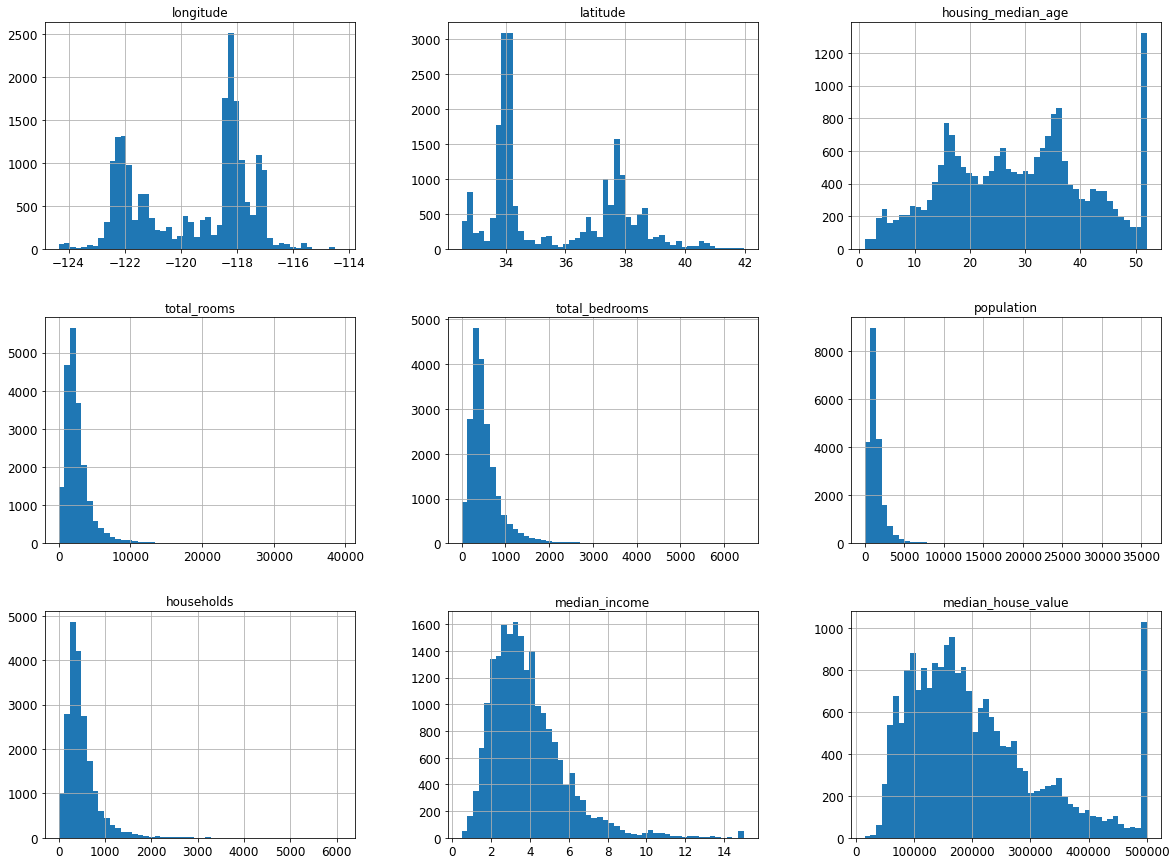

In [13]:
housing.hist(bins = 50, figsize=(20,15))
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_set, test_set = train_test_split(housing,test_size=.2, random_state=42)

In [16]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<AxesSubplot:>

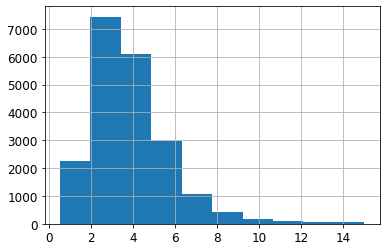

In [17]:
housing.loc[:,"median_income"].hist()

In [18]:
housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0.,1.5,3.0,4.5,6.,np.inf],
    labels=[1,2,3,4,5]
)

In [19]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

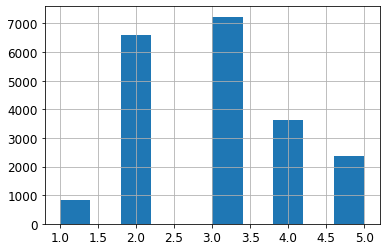

In [20]:
housing["income_cat"].hist()

In [21]:
# okay so stratified sampling here:
from sklearn.model_selection import StratifiedShuffleSplit

In [22]:
split = StratifiedShuffleSplit(
    n_splits=1,test_size=0.2,random_state=42
)

In [23]:
for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [24]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [25]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

As we can see, the data is perfectly split into test and training datasets

In [26]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

# Exploring Data

In [27]:
housing = strat_train_set.copy()

In [28]:
# scatterplot
import matplotlib.cm as cm

def plot_scatter(housing,x_dim,y_dim):
    x = housing[x_dim]
    y = housing[y_dim]

    fig,ax = plt.subplots(figsize = (10,5))
    color = "#00A658"

    ax.scatter(x,y,color= color, alpha= 0.4)
    ax.set_title("Latitude, longitude")
    #removing top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    plt.show()


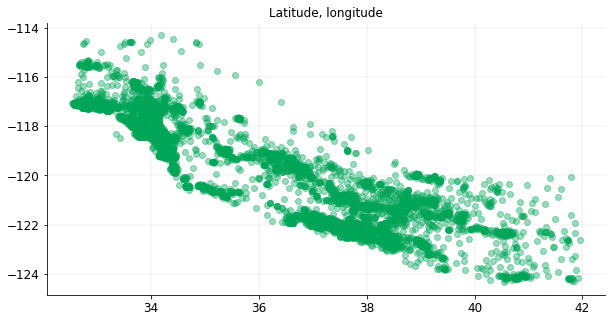

In [29]:
plot_scatter(housing,"latitude","longitude")

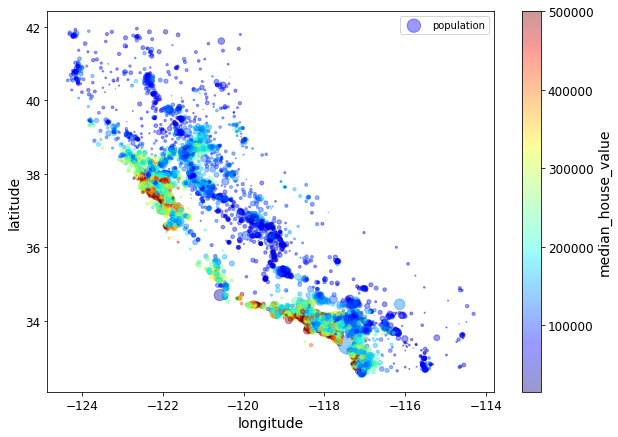

In [30]:
housing.plot(
    kind = "scatter",
    x = "longitude",
    y = "latitude",
    alpha = 0.4,
    s = housing["population"]/100,
    label = "population",
    figsize = (10,7),
    c = "median_house_value", cmap = plt.get_cmap("jet"),
    colorbar = True,
    sharex = False
)
plt.legend(loc="best")
plt.show()

# LOOKING FOR CORRELATIONS

In [31]:
correlations = housing.corr()

In [32]:
correlations

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


## Let us see how different attributes are correlating with the house median price

In [33]:
correlations.loc[:,"median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

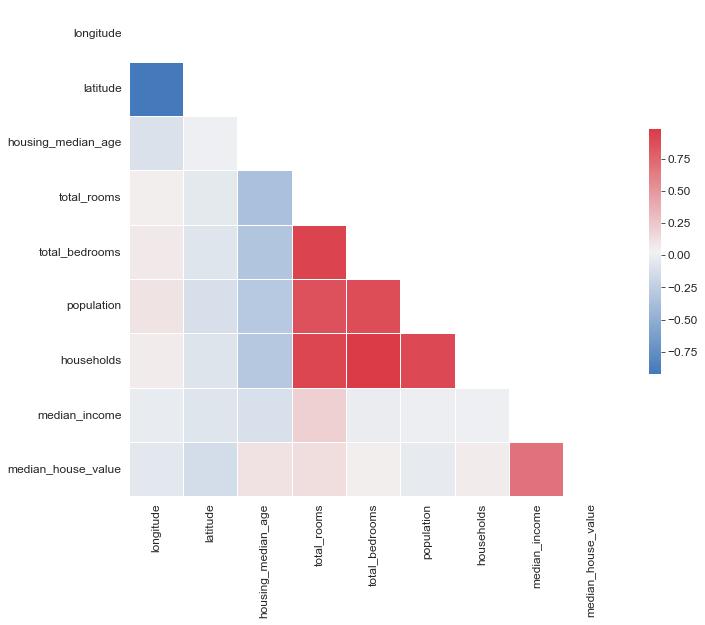

In [34]:
def CorrMtx(df, dropDuplicates = True):
    if dropDuplicates:
        mask = np.zeros_like(df, dtype=np.bool_)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap,
                    square=True,
                    linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap,
                    square=True,
                    linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(correlations, dropDuplicates = True)

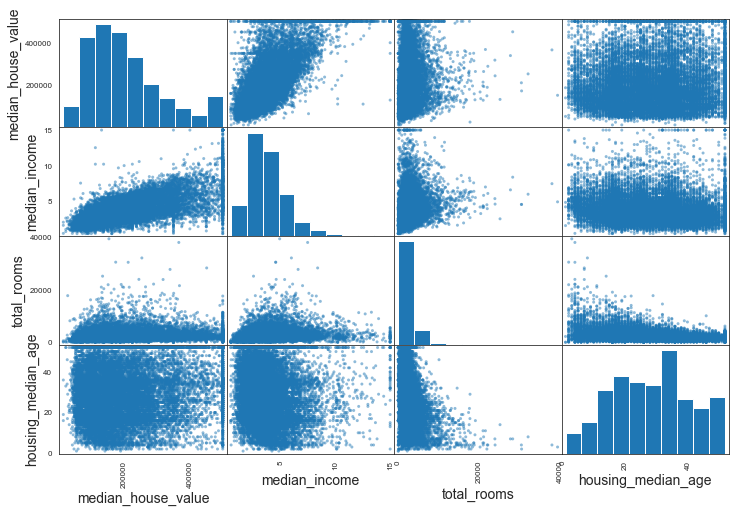

In [35]:
attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]

from pandas.plotting import scatter_matrix

scatter_matrix(housing[attributes], figsize = (12,8))
plt.show()

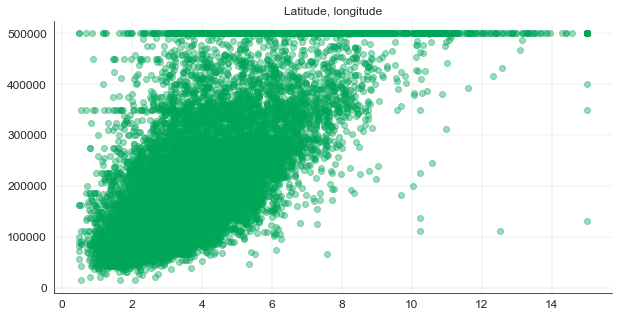

In [36]:
plot_scatter(housing, "median_income","median_house_value")

# Experimenting with Feature Combinations

In [37]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [38]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

CorrMtx(corr_matrix,True)

In [39]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406,0.212873,3.096469
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696,0.057378,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168,0.175304,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342,0.203027,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361,0.239816,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# Data Preparation

In [40]:
housing = strat_train_set.drop("median_house_value",axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [41]:
# treat missing values
from sklearn.impute import SimpleImputer

In [42]:
imputer = SimpleImputer(strategy="median")

In [43]:
housing_num = housing.drop("ocean_proximity",axis=1)

In [44]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [45]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [46]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [47]:
X = imputer.transform(housing_num)

In [48]:
housing_tr = pd.DataFrame(X,columns = housing_num.columns,index = housing_num.index)

In [49]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


# Handling Categories

In [50]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [51]:
from sklearn.preprocessing import OrdinalEncoder

In [52]:
encoder = OrdinalEncoder()

In [53]:
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded[0:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [54]:
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [55]:
from sklearn.preprocessing import OneHotEncoder

In [56]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [57]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Custom Transformers

In [58]:
from sklearn.base import BaseEstimator,TransformerMixin

room_ix, bedroom_ix, population_ix,households_idx = 3,4,5,6

class CombinedAttributesAdder (BaseEstimator,TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y = None):
        return self

    def transform(self,X):
        rooms_per_household = X[:,room_ix] / X[:,households_idx]
        population_per_household = X[:,population_ix] / X[:,households_idx]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedroom_ix] / X[:,room_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]

attr_added = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_added.transform(housing.values)

In [59]:
col_names = "total_rooms","total_bedrooms","population","households"

room_ix,bedroom_ix,population_ix,households_idx = [
    housing.columns.get_loc(c) for c in col_names
]

In [60]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns) + ["rooms_per_household", "population_per_household"],
    index=housing.index
)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


# PIPELINING

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scalar',StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [62]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [63]:
from sklearn.compose import ColumnTransformer

In [64]:
num_attrbs = list(housing_num)
cat_attrbs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attrbs),
    ("cat", OneHotEncoder(), cat_attrbs)
])

housing_prepared = full_pipeline.fit_transform(housing)

In [65]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [66]:
housing_prepared.shape

(16512, 16)

# LINEAR REGRESSION MODEL

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [69]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[0:5]
some_data_prepared = full_pipeline.transform(some_data)

print("predictions: ", lin_reg.predict(some_data_prepared))

predictions:  [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [70]:
print("Labels: ",list(some_labels))

Labels:  [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [71]:
from sklearn.metrics import mean_squared_error

In [72]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse =  mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

learly not a great score: most districts’
range between $120,000 & $265,000, so a typical prediction error of $68,628 is not very satisfying.

# DECISION TREE REGRESSION

In [73]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(random_state=42)

In [74]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_rmse =  mean_squared_error(housing_labels,housing_predictions,squared=False)
tree_rmse

0.0

### Wait Whaaaaaaa ?!?!?!??!!?!
### ZERO???
need to use part of the training set for training and part of it for model validation.

In [75]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared,housing_labels, scoring = "neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores)

In [76]:
def display_scores(score):
    print("Scores: ",score)
    print("Mean: ", score.mean())
    print("Standard Daviation: ",score.std())

display_scores(tree_rmse_scores)

Scores:  [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
Mean:  71629.89009727491
Standard Daviation:  2914.035468468928


### Cross validation with linear regression model

In [77]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean:  69104.07998247063
Standard Daviation:  2880.328209818068


## with the help of RANDOM FOREST REGRESSION

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor(random_state=42)

In [80]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18650.698705770003

In [ ]:
forest_scores = cross_val_score(forest_reg, housing_prepared,housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

# FINE TUNE
##### GRID SEARCH

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]}
]

In [ ]:
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared,housing_labels)

In [ ]:
cvres = grid_search.cv_results_

In [ ]:
x=  pd.DataFrame(grid_search.cv_results_)
x

In [ ]:
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score), params)

# RANDOMIZED SEARCH

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
params_dist = {
    'n_estimators': randint(low=1,high=200),
    'max_features': randint(low=1,high=8)
}
forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=params_dist, n_iter=10,cv=5,scoring = 'neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared,housing_labels)

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

### ANALYZE THE BEST MODELS AND THEIR ERRORS

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [ ]:
extra_attrbs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attrbs = list(cat_encoder.categories_[0])
attributes = num_attrbs + extra_attrbs + cat_one_hot_attrbs
sorted(zip(feature_importances, attributes), reverse=True)

# EVALUATE YOUR SYSTEM ON THE THE TEST

In [ ]:
final_mode = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis = 1)
Y_test = strat_test_set["median_house_value"].copy()

x_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_mode.predict(x_test_prepared)

final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

In [ ]:
from scipy import  stats

In [ ]:
confidence = 0.95
squared_errors = (final_predictions - Y_test)**2
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1, loc = squared_errors.mean(), scale = stats.sem(squared_errors)))

In [ ]:
# using Z scores
m = len(squared_errors)
mean = squared_errors.mean()
zScore = stats.norm.ppf((1+confidence)/2)
zMargin = zScore*squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean-zMargin), np.sqrt(mean+zMargin)

# THANKYOU